In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import colormaps as cmaps
from matplotlib import colors

In [2]:
plt.rcParams["figure.facecolor"] = 'w'

In [3]:
plt.style.use('ggplot')
# plt.style.use('default')

In [4]:
# TO DO

In [5]:
# river indexes (in fortran +1)!
rdict = {'Ob': 62, 'Lena': 74, 'Yenisey': 66,
         'Mackenzie': 106, 'Pechora': 59, 'Kolyma': 82,
         'N.Dvina': 56, 'Yukon': 609}  # 607 rivers in v9 po!

## Read datasets

In [9]:
ds = xr.open_mfdataset('from_Fram/*.nc', data_vars='minimal')

In [10]:
ds

<xarray.Dataset>
Dimensions:          (river_time: 444, river: 609, s_rho: 40)
Coordinates:
  * river_time       (river_time) datetime64[ns] 1980-01-15 ... 2016-12-15
  * river            (river) float64 1.0 2.0 3.0 4.0 ... 606.0 607.0 608.0 609.0
Dimensions without coordinates: s_rho
Data variables: (12/40)
    river_transport  (river_time, river) float64 dask.array<chunksize=(120, 609), meta=np.ndarray>
    river_Xposition  (river) float64 dask.array<chunksize=(609,), meta=np.ndarray>
    river_Eposition  (river) float64 dask.array<chunksize=(609,), meta=np.ndarray>
    river_direction  (river) float64 dask.array<chunksize=(609,), meta=np.ndarray>
    river_Vshape     (s_rho, river) float64 dask.array<chunksize=(40, 609), meta=np.ndarray>
    river_salt       (river_time, s_rho, river) float64 dask.array<chunksize=(120, 40, 609), meta=np.ndarray>
    ...               ...
    river_NR3_c      (river_time, s_rho, river) float64 dask.array<chunksize=(120, 40, 609), meta=np.ndarray>
    river_CR1_c      (river_time, s_rho, river) float64 dask.array<chunksize=(120, 40, 609), meta=np.ndarray>
    river_CR1_n      (river_time, s_rho, river) float64 dask.array<chunksize=(120, 40, 609), meta=np.ndarray>
    river_CR1_p      (river_time, s_rho, river) float64 dask.array<chunksize=(120, 40, 609), meta=np.ndarray>
    river_CR2_c      (river_time, s_rho, river) float64 dask.array<chunksize=(120, 40, 609), meta=np.ndarray>
    river_CR3_c      (river_time, s_rho, river) float64 dask.array<chunksize=(120, 40, 609), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.9.3 (http://mpimet.mpg.de/...
    Conventions:  CF-1.6
    history:      Sat May 16 19:47:35 2020: cdo -selyear,1980/1989 A20niva_ri...
    notes:        PWA 29/04/2020: copied from A20niva_river_v5_pwa2.nc\nPWA 2...
    NCO:          4.7.2
    CDO:          Climate Data Operators version 1.9.3 (http://mpimet.mpg.de/...

In [11]:
po = xr.open_dataset('river_v9_po/A20niva_river_v9_po.nc')

In [12]:
po

<xarray.Dataset>
Dimensions:          (river: 607, s_rho: 40, river_time: 492)
Coordinates:
  * river            (river) int32 1 2 3 4 5 6 7 ... 601 602 603 604 605 606 607
  * river_time       (river_time) datetime64[ns] 1980-01-15 ... 2020-12-15
Dimensions without coordinates: s_rho
Data variables:
    river_Eposition  (river) float64 ...
    river_Vshape     (s_rho, river) float64 ...
    river_Xposition  (river) float64 ...
    river_direction  (river) float64 ...
    river_salt       (river_time, s_rho, river) float64 ...
    river_temp       (river_time, s_rho, river) float64 ...
    river_transport  (river_time, river) float64 ...
Attributes:
    CDI:                       Climate Data Interface version 1.9.10 (https:/...
    Conventions:               CF-1.6
    notes:                     PWA 29/04/2020: copied from A20niva_river_v5_p...
    CDO:                       Climate Data Operators version 1.9.10 (https:/...
    nco_openmp_thread_number:  1
    history:                   Tue Aug 15 15:17:21 2023: ncatted -O -a histor...
    NCO:                       netCDF Operators version 5.0.3 (Homepage = htt...

In [14]:
b6 = pd.read_csv('big6_predicted_1980-2019\\big6_predicted_1980-2019\\monthly_mean\\big6_chem_monthly_all_vars.csv', parse_dates=['date'])
b6 = b6.set_index('date')

In [15]:
b6['var'].unique()

array(['Alk', 'DOC', 'NO3', 'NH4', 'TDP', 'PO4', 'SiO2', 'UTHg', 'POC',
       'PON', 'DON', 'DHP'], dtype=object)

In [16]:
# (ммоль/л) = (мг/л)/молярная масса
# (ммоль/м3) = (ммоль/л)*1000
# молярная масса N = 14

In [17]:
b6doc = b6[b6['var'] == 'DOC'].drop(columns='var')
b6don = b6[b6['var'] == 'DON'].drop(columns='var')
b6no3 = b6[b6['var'] == 'NO3'].drop(columns='var')
b6nh4 = b6[b6['var'] == 'NH4'].drop(columns='var')
b6pon = b6[b6['var'] == 'PON'].drop(columns='var')
b6poc = b6[b6['var'] == 'POC'].drop(columns='var')

# from mg/L to mmol/m3
b6no3 = (b6no3/14)*1000
b6nh4 = (b6nh4/14)*1000
b6don = (b6don/14)*1000
b6pon = (b6pon/14)*1000
b6doc = (b6doc/12)*1000

In [18]:
# DOM = DON
b6don['Ob'] = b6don['Ob']/2
b6dom = b6don

In [23]:
# river_N3_n = river_B_OXYDEP_NUT

<Axes: xlabel='date'>

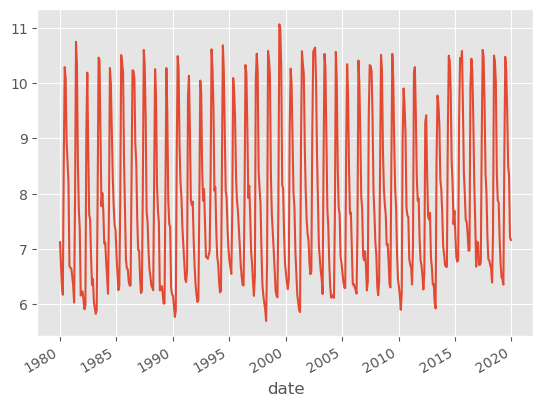

In [19]:
b6don['Ob'].plot()

### By default, fill NUT with variables from ERSEM
## DOM is 3

In [20]:
nut = np.empty((444, 40, 610))  # 610 with Yukon
dom = np.empty((444, 40, 610))
nut[:,:,:609] = ds['river_N3_n'].values  # up to 609 withot Yukon
dom[:,:,:609] = 3

## Change NUT and DOM from B6 by Leah

In [21]:
rivers = ['Ob', 'Yenisey', 'Lena', 'Kolyma', 'Mackenzie', 'Yukon']
vs = [b6no3, b6dom]
vnames = ['NO3', 'DOM']

In [22]:
for riv in rivers:
    nut[:,:,rdict[riv]] = np.tile(b6no3[riv]['1980':'2016'], (40,1)).T
    dom[:,:,rdict[riv]] = np.tile(b6dom[riv]['1980':'2016'], (40,1)).T

In [23]:
np.any(np.isnan(dom))

False

# QC

In [28]:
rivers = ['Ob', 'Yenisey', 'Lena', 'Kolyma', 'Mackenzie', 'Yukon', 'Pechora', 'N.Dvina']

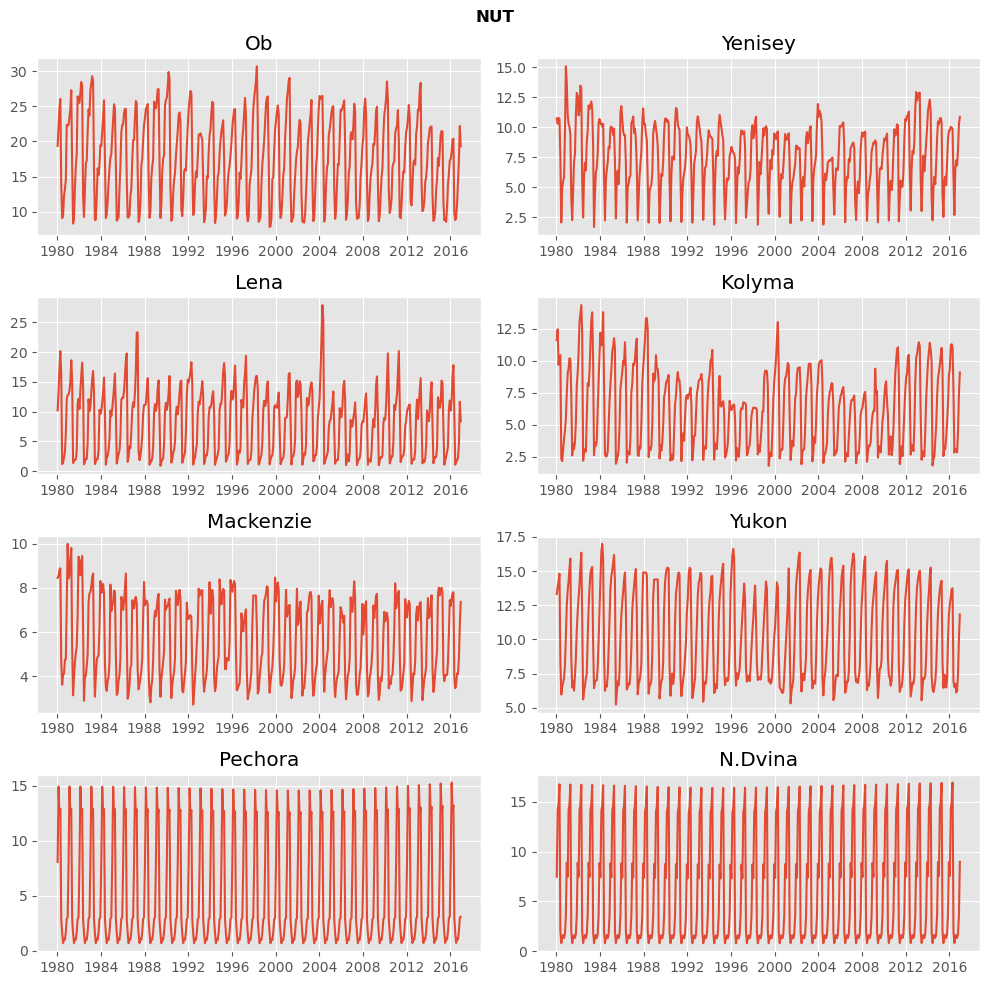

In [20]:
fig, axs = plt.subplots(4,2,figsize=(10,10))
for riv, ax in zip(rivers, axs.ravel()):
    ir = rdict[riv]
    ax.plot(b6no3.index[:444], nut[:,0,ir])
    ax.set_title(riv)
fig.suptitle('NUT', fontweight='bold')
plt.tight_layout()

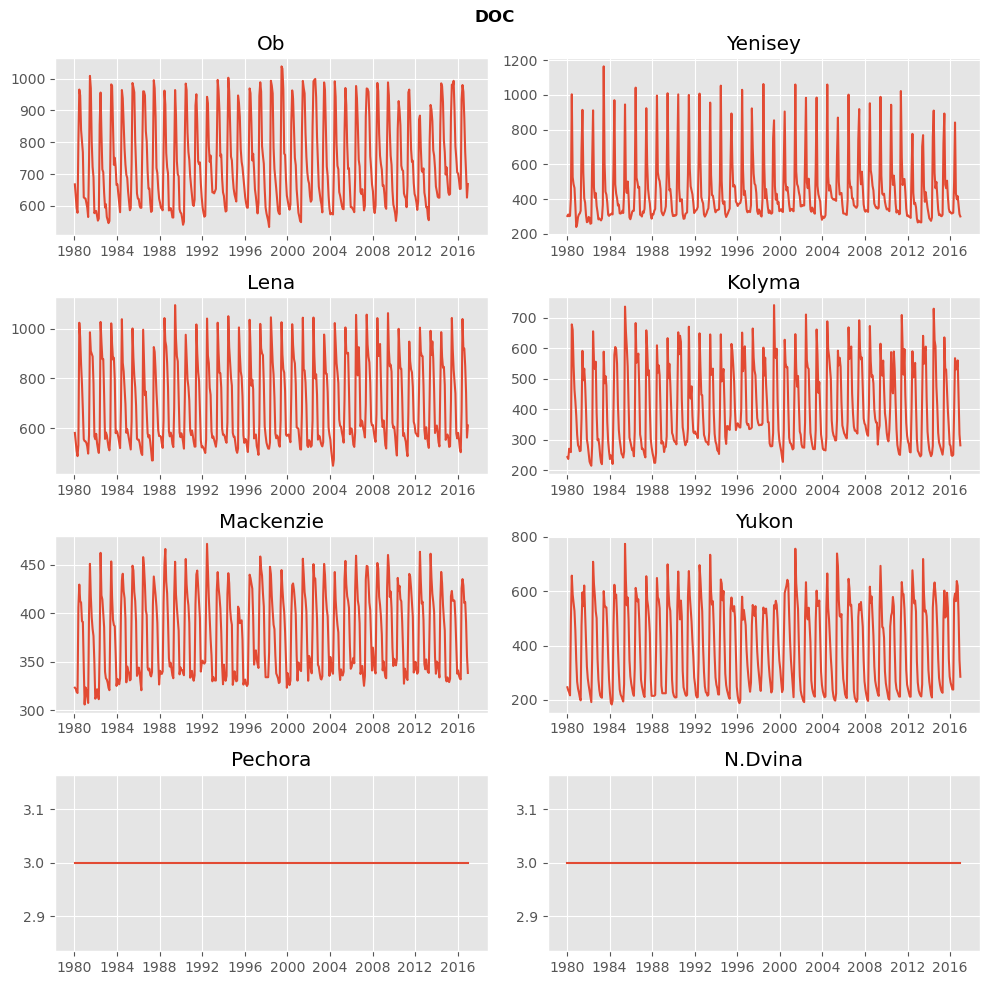

In [29]:
fig, axs = plt.subplots(4,2,figsize=(10,10))
for riv, ax in zip(rivers, axs.ravel()):
    ir = rdict[riv]
    ax.plot(b6dom.index[:444], dom[:,0,ir])
    ax.set_title(riv)
fig.suptitle('DOC', fontweight='bold')
plt.tight_layout()

In [15]:
# ds = ds.assign(river_B_OXYDEP_NUT=ds["river_N3_n"])
# ds = ds.assign(river_B_OXYDEP_DOM=ds["river_NR1_n"] + ds["river_CR1_n"])

In [19]:
nut[:,:,:609].shape

(444, 40, 609)

In [24]:
# NUT
xnut = xr.DataArray(nut[:,:,:609], coords={'river_time': ds['river_time'], 'river': ds['river']},
                    dims=['river_time', 's_rho', 'river'],
                    attrs={'long_name': 'NUT', 'units': 'mmol N/m3',})

# DOM
xdom = xr.DataArray(dom[:,:,:609], coords={'river_time': ds['river_time'], 'river': ds['river']},
                    dims=['river_time', 's_rho', 'river'],
                    attrs={'long_name': 'DOM', 'units': 'mmol N/m3',})

# Alk = 1000
xalk = xr.DataArray(np.full((444, 40, 609), 1000), coords={'river_time': ds['river_time'], 'river': ds['river']},
                    dims=['river_time', 's_rho', 'river'],
                    attrs={'long_name': 'Alkalinity', 'units': 'mmol/m3',})

# DIC = 1030
xdic = xr.DataArray(np.full((444, 40, 609), 1030), coords={'river_time': ds['river_time'], 'river': ds['river']},
                    dims=['river_time', 's_rho', 'river'],
                    attrs={'long_name': 'DIC', 'units': 'mmol C/m3',})

# Hg
xhg = xr.DataArray(np.full((444, 40, 609), 1e-5), coords={'river_time': ds['river_time'], 'river': ds['river']},
                    dims=['river_time', 's_rho', 'river'],
                    attrs={'long_name': 'Hg2', 'units': 'mmol Hg/m3',})

ds['river_B_OXYDEP_NUT'] = xnut
ds['river_B_OXYDEP_DOM'] = xdom
ds['river_B_C_Alk'] = xalk
ds['river_B_C_DIC'] = xdic
ds['river_B_Hg_Hg2'] = xhg

In [25]:
ds['river_N3_n'].encoding

{'source': 'C:\\Users\\ABE\\OneDrive\\scripts\\A20\\BEST-Siberian\\Rivers\\from_Fram\\A20niva_river_1980_1989_v6.nc',
 'original_shape': (120, 40, 609),
 'dtype': dtype('float64')}

In [26]:
variables = ['river', 's_rho', 'river_time',  # mind the order of dimensions!
             'river_transport',
             'river_Xposition', 'river_Eposition',
             'river_direction', 'river_Vshape',
             'river_salt', 'river_temp',
             'river_B_OXYDEP_NUT', 'river_B_OXYDEP_DOM',
             'river_B_C_Alk', 'river_B_C_DIC',
             'river_B_Hg_Hg2',]
ds[variables].to_netcdf('A20rivers_OD_carb_hg_1980-2016.nc') 

In [ ]:
# ds.to_netcdf('river_fin.nc') 

In [14]:
# !!! TO PLOT MAP OF RIVER POINTS + SALINITY !!!
# temp = out['temp'].values[0,0,:,:]
# salt = out['salt'].values[0,0,:,:]

# fig, ax = plt.subplots(figsize=(6,4))
# cf = ax.contourf(salt, cmap=cmo.cm.haline,levels=np.linspace(0,37,38))
# ax.scatter(rx,ry, s=10, c='slategray')
# plt.colorbar(cf, label='Соленость, ‰')
# plt.title('Июль 2014')
# # plt.show()
# plt.savefig('rivers.png', dpi=300, bbox_inches='tight')